In [5]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import sys
sys.path.append("../../")
# Importamos nuestras funciones
# -----------------------------------------------------------------------
from src import  soporte_ajuste_logistica as sal

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df = pd.read_pickle("../../datos/06_datos_balanceados.pkl")

# Mejor modelo XGBoost
- Vamos a ajustar parámetros para que de lo mejor de sí
- Guardaremos el modelo para su posterior uso

# Modelo Original

In [ ]:
# instanciamos la clase de regresión logistica
xgbooster_og = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition",train_size=0.8)

# llamamos a la función para ajustar el modelo
xgbooster_og.ajustar_modelo("xgboost",ruta_guardar_modelo="../../datos/encoders_y_modelos/",nombre_modelo_guardar="XGBooster.pkl")

In [ ]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_og_xgboost = xgbooster_og.calcular_metricas(modelo_nombre = "xgboost").T
df_og_xgboost["modelo"] = "original"
df_og_xgboost

,accuracy,precision,recall,f1,kappa,auc,modelo
train,0.992886,0.992960,0.992886,0.992886,0.985773,0.999932,original
test,0.924949,0.924959,0.924949,0.924920,0.849269,0.972189,original


# Mejor modelo

In [ ]:
params_xgb = {
    'n_estimators': [290],  
    'learning_rate': [0.05], 
    'max_depth': [9],  
    'min_child_weight': [0], 
    'subsample': [0.8, 0.9],  
    'colsample_bytree': [0.4]
    }

In [ ]:
# instanciamos la clase de regresión logistica
xgbooster = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition",train_size=0.8)

# llamamos a la función para ajustar el modelo
xgbooster.ajustar_modelo("xgboost", param_grid=params_xgb, ruta_guardar_modelo="../../datos/encoders_y_modelos/", nombre_modelo_guardar="best_model.pkl")

-------------------------------------------------
Parámetros de Grid Search:


{'n_estimators': [290, 295],
 'learning_rate': [0.05],
 'max_depth': [9],
 'min_child_weight': [0],
 'subsample': [0.8, 0.9],
 'colsample_bytree': [0.4]}

-------------------------------------------------
-------------------------------------------------
El mejor modelo es:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=0, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=290, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
-------------------------------------------------


### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [ ]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_xgboost = xgbooster.calcular_metricas(modelo_nombre = "xgboost").T
df_xgboost["modelo"] = "mejor_modelo"
df_xgboost

,accuracy,precision,recall,f1,kappa,auc,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,mejor_modelo
test,0.939148,0.940378,0.939148,0.938996,0.877463,0.975822,mejor_modelo


### Matriz Confusion

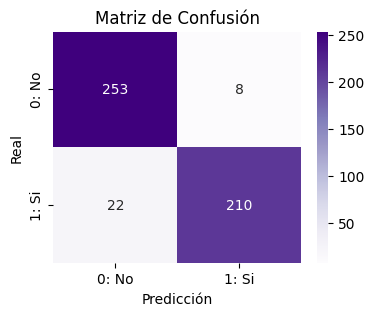

In [ ]:
xgbooster.plot_matriz_confusion("xgboost",invertir=False,labels=True,label0="No",label1="Si")

### Sobre la Matriz
- 253 Verdaderos Negativos
- 8 Falsos Positivos (Al final no se van)
- 22 Falsos Negativos (Al final si se van)
- 210 Verdaderos Positivos 


### Curva ROC

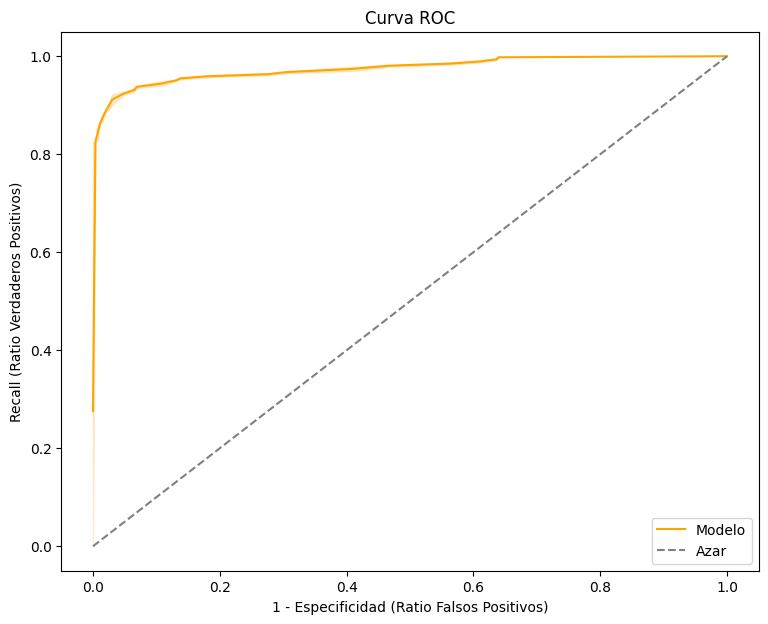

In [ ]:
xgbooster.plot_curva_ROC()

### Importancia

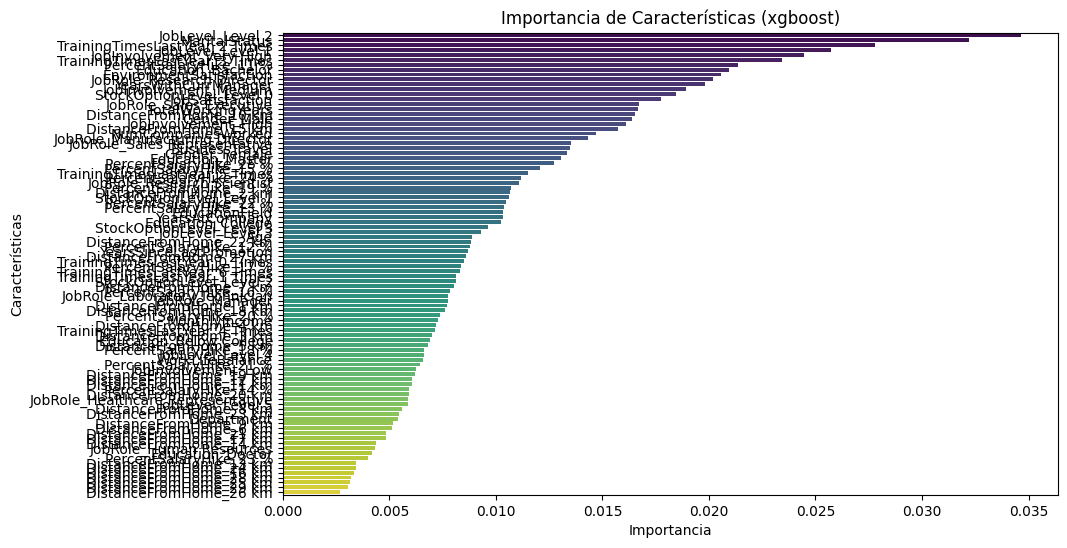

In [ ]:
# Mostramos la importancia de los predictores en el modelo regresión logística
xgbooster.importancia_predictores(modelo_nombre ='xgboost',grafica_size=(10,20))

### Shap Plots

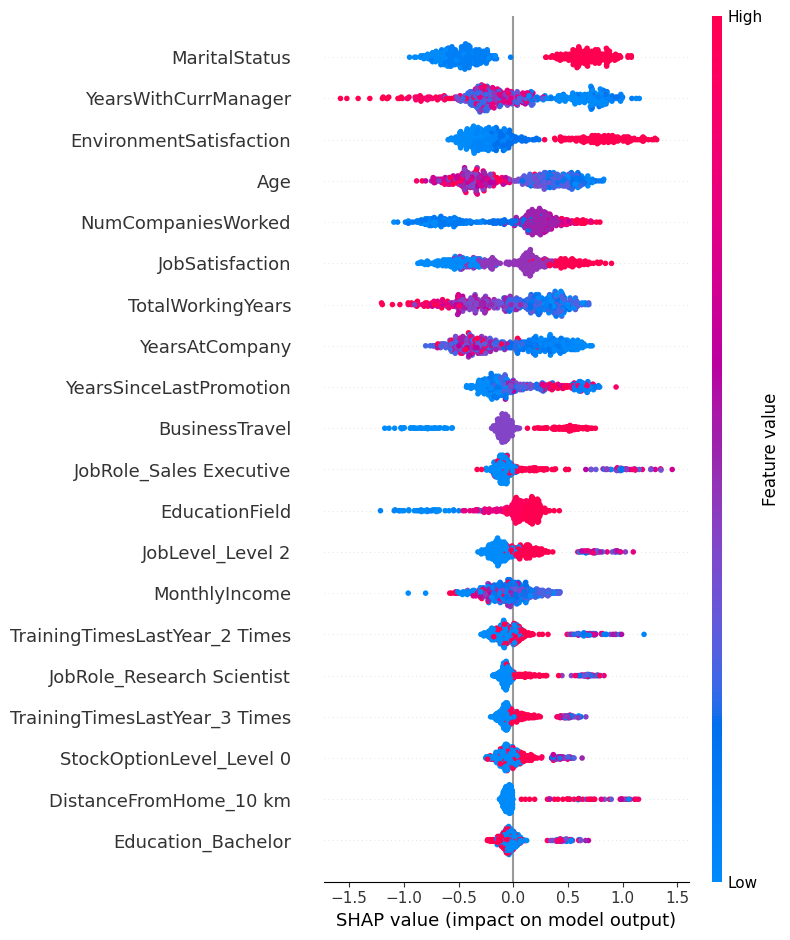

In [ ]:
xgbooster.plot_shap_summary(modelo_nombre ='xgboost')

In [ ]:
resultados = pd.concat([df_og_xgboost,df_xgboost])
resultados

,accuracy,precision,recall,f1,kappa,auc,modelo
train,0.992886,0.992960,0.992886,0.992886,0.985773,0.999932,original
test,0.924949,0.924959,0.924949,0.924920,0.849269,0.972189,original
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,mejor_modelo
test,0.939148,0.940378,0.939148,0.938996,0.877463,0.975822,mejor_modelo
